In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
covid = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

In [4]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [5]:
covid.rename(columns={
    'Province/State': 'state',
    'Country/Region': 'country',
},inplace=True)

In [6]:
covid.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [7]:
covid['active'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']
covid.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [8]:
top = covid[covid['Date'] == covid['Date'].max()]
world = top.groupby('country')['Confirmed','Deaths','Recovered','active'].sum().reset_index()

In [9]:
world.head()

,country,Confirmed,Deaths,Recovered,active
0,Afghanistan,40.0,1.0,1.0,38.0
1,Albania,89.0,2.0,2.0,85.0
2,Algeria,201.0,17.0,65.0,119.0
3,Andorra,113.0,1.0,1.0,111.0
4,Angola,2.0,0.0,0.0,2.0


In [10]:
fig = px.choropleth(world,locations='country', locationmode='country names', 
                    color='active', hover_name='country', range_color=[1,5000], color_continuous_scale='Peach')

In [11]:
fig.show()

In [12]:
total_cases = covid.groupby('Date')['Date','Confirmed'].sum().reset_index()

In [13]:
total_cases

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


In [14]:
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
total_cases

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


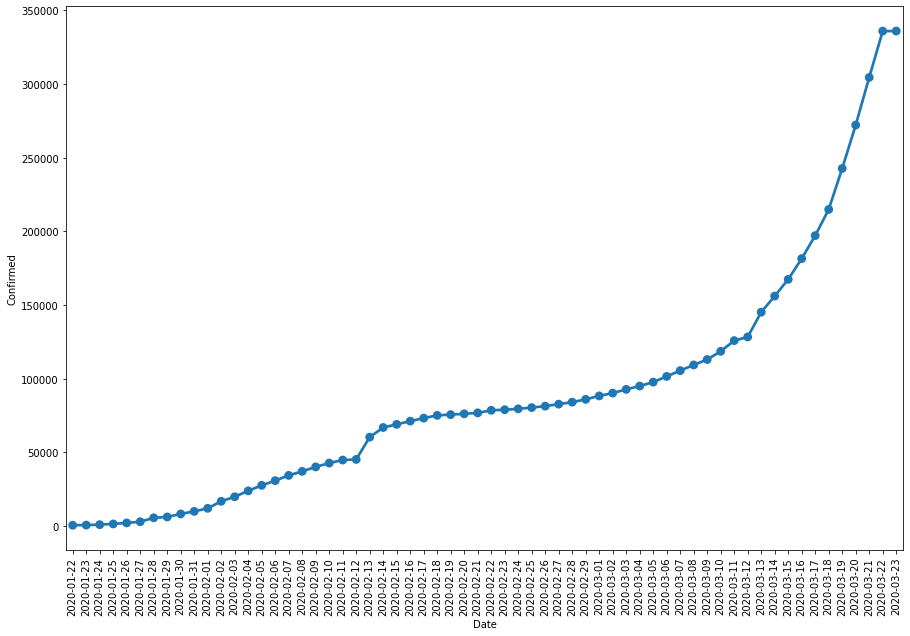

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
ax = sns.pointplot(x=total_cases.Date.dt.date, y = total_cases.Confirmed)

In [16]:
top_actives = top.groupby('country')['active'].sum().reset_index().head(20).sort_values(by = 'active',ascending=False)
top_actives.head()

,country,active
9,Austria,3219.0
16,Belgium,3063.0
8,Australia,1219.0
6,Argentina,218.0
7,Armenia,192.0


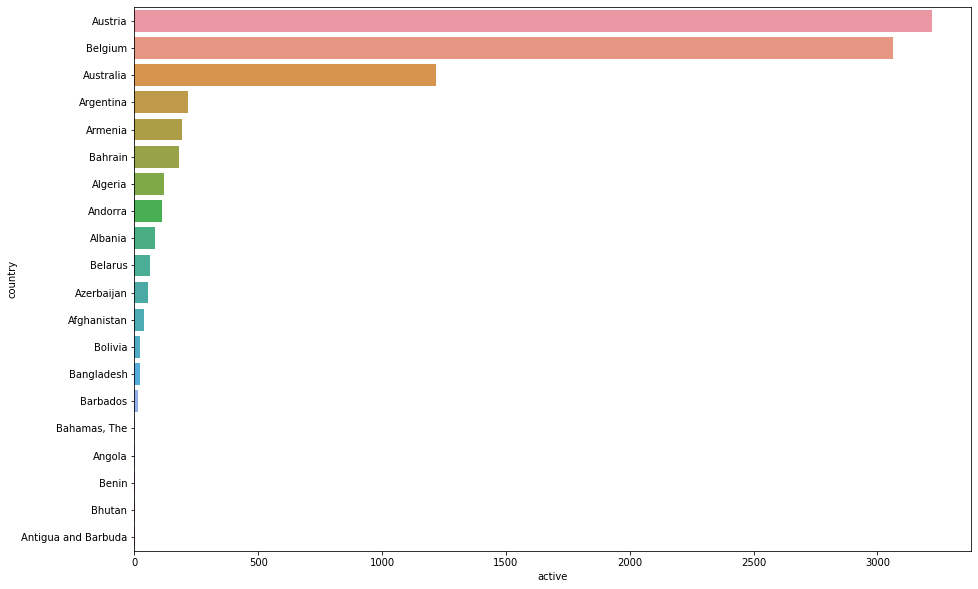

In [17]:
plt.figure(figsize=(15,10))
ax1 = sns.barplot(x=top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, 'pda',size = 10, ha = 'left', va='center')

In [18]:
top_deaths = top.groupby('country')['Deaths'].sum().reset_index().head(20).sort_values(by = 'Deaths',ascending=False)
top_deaths.head()

,country,Deaths
16,Belgium,75.0
2,Algeria,17.0
9,Austria,16.0
8,Australia,7.0
6,Argentina,4.0


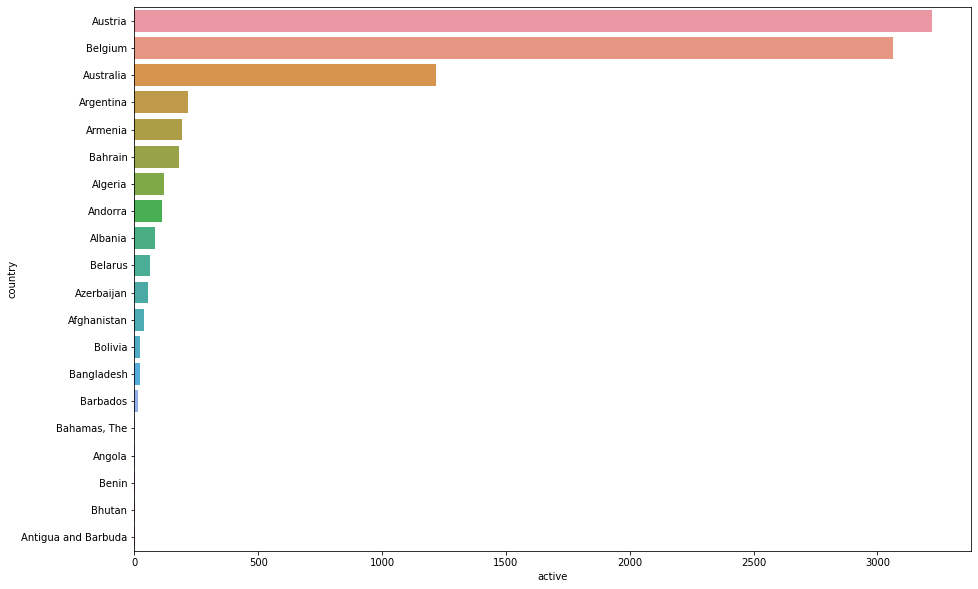

In [19]:
plt.figure(figsize=(15,10))
ax1 = sns.barplot(x=top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_deaths.Deaths, top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',size = 10, ha = 'left', va='center')

In [20]:
top_recovered = top.groupby('country')['Recovered'].sum().reset_index().head(20).sort_values(by = 'Recovered',ascending=False)
top_recovered.head()

,country,Recovered
16,Belgium,263.0
12,Bahrain,149.0
8,Australia,88.0
2,Algeria,65.0
15,Belarus,15.0


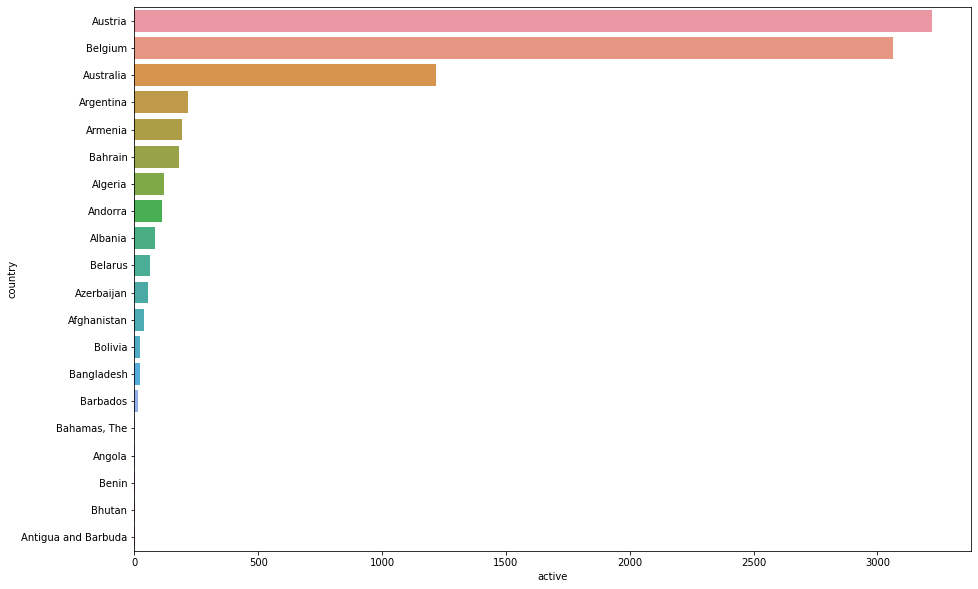

In [21]:
plt.figure(figsize=(15,10))
ax1 = sns.barplot(x=top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_recovered.Recovered, top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',size = 10, ha = 'left', va='center')

In [22]:
china = covid[covid.country == 'China']
china = china.groupby('Date')['Recovered', 'Confirmed', 'Deaths', 'active'].sum().reset_index()
china

,Date,Recovered,Confirmed,Deaths,active
0,2020-01-22,28.0,548.0,17.0,503.0
1,2020-01-23,30.0,643.0,18.0,595.0
2,2020-01-24,36.0,920.0,26.0,858.0
3,2020-01-25,39.0,1406.0,42.0,1325.0
4,2020-01-26,49.0,2075.0,56.0,1970.0
...,...,...,...,...,...
57,2020-03-19,70535.0,81156.0,3249.0,7372.0
58,2020-03-20,71266.0,81250.0,3253.0,6731.0
59,2020-03-21,71857.0,81305.0,3259.0,6189.0
60,2020-03-22,72362.0,81397.0,3265.0,5770.0


In [23]:
US = covid[covid.country == 'US']
US = US.groupby('Date')['Recovered', 'Confirmed', 'Deaths', 'active'].sum().reset_index()
US

,Date,Recovered,Confirmed,Deaths,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,0.0,13677.0,200.0,13477.0
58,2020-03-20,0.0,19100.0,244.0,18856.0
59,2020-03-21,0.0,25489.0,307.0,25182.0
60,2020-03-22,0.0,33272.0,417.0,32855.0


In [24]:
Italy = covid[covid.country == 'Italy']
Italy = Italy.groupby('Date')['Recovered', 'Confirmed', 'Deaths', 'active'].sum().reset_index()
Italy

,Date,Recovered,Confirmed,Deaths,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,4440.0,41035.0,3405.0,33190.0
58,2020-03-20,4440.0,47021.0,4032.0,38549.0
59,2020-03-21,6072.0,53578.0,4825.0,42681.0
60,2020-03-22,7024.0,59138.0,5476.0,46638.0


In [25]:
India = covid[covid.country == 'India']
India = India.groupby('Date')['Recovered', 'Confirmed', 'Deaths', 'active'].sum().reset_index()
India

,Date,Recovered,Confirmed,Deaths,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,15.0,194.0,4.0,175.0
58,2020-03-20,20.0,244.0,5.0,219.0
59,2020-03-21,23.0,330.0,4.0,303.0
60,2020-03-22,27.0,396.0,7.0,362.0


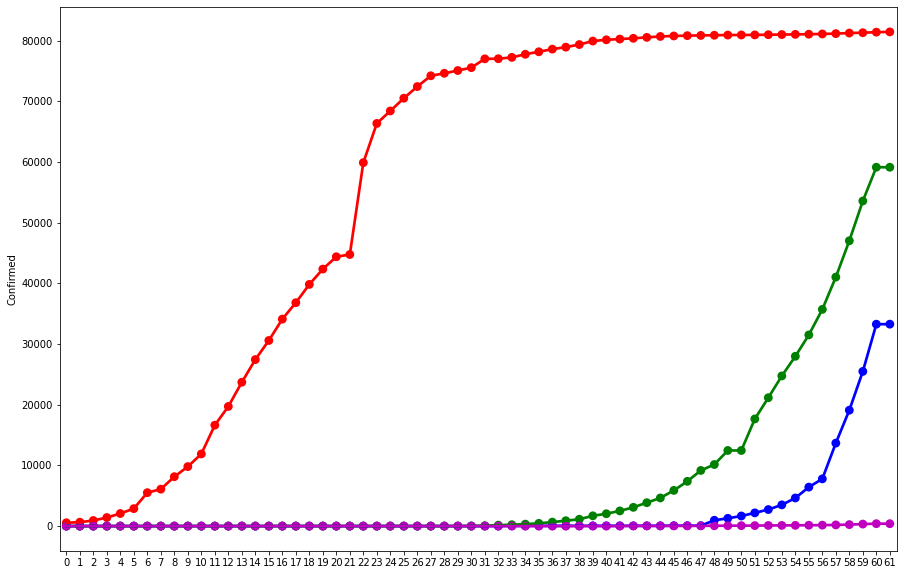

In [26]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.Confirmed, color = 'red')
sns.pointplot(US.index, US.Confirmed, color = 'blue')
sns.pointplot(Italy.index, Italy.Confirmed, color = 'green')
sns.pointplot(India.index, India.Confirmed, color = 'm')

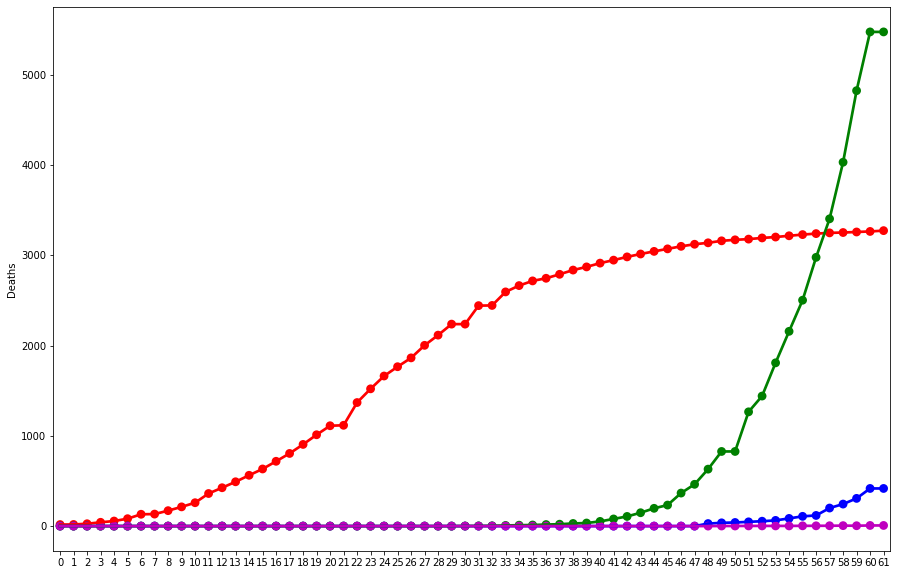

In [27]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.Deaths, color = 'red')
sns.pointplot(US.index, US.Deaths, color = 'blue')
sns.pointplot(Italy.index, Italy.Deaths, color = 'green')
sns.pointplot(India.index, India.Deaths, color = 'm')

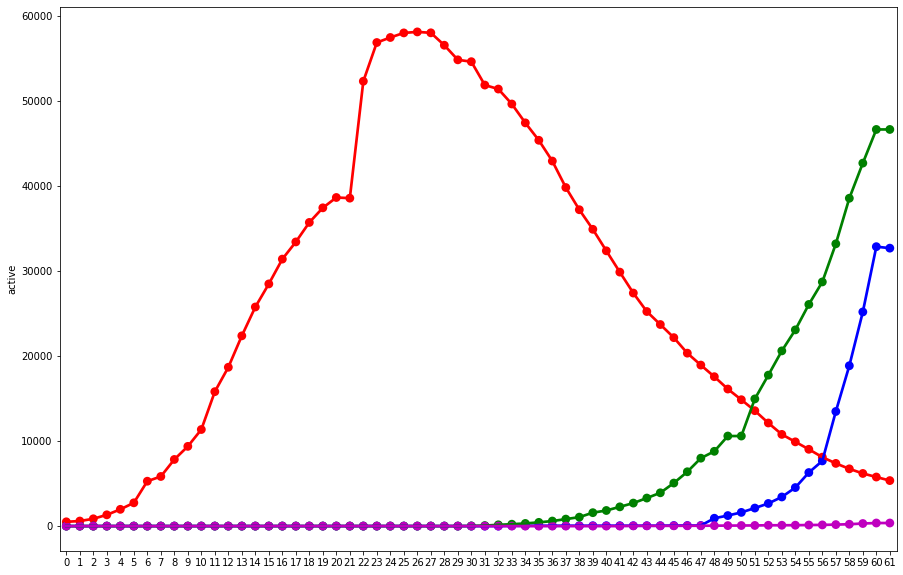

In [28]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.active, color = 'red')
sns.pointplot(US.index, US.active, color = 'blue')
sns.pointplot(Italy.index, Italy.active, color = 'green')
sns.pointplot(India.index, India.active, color = 'm')

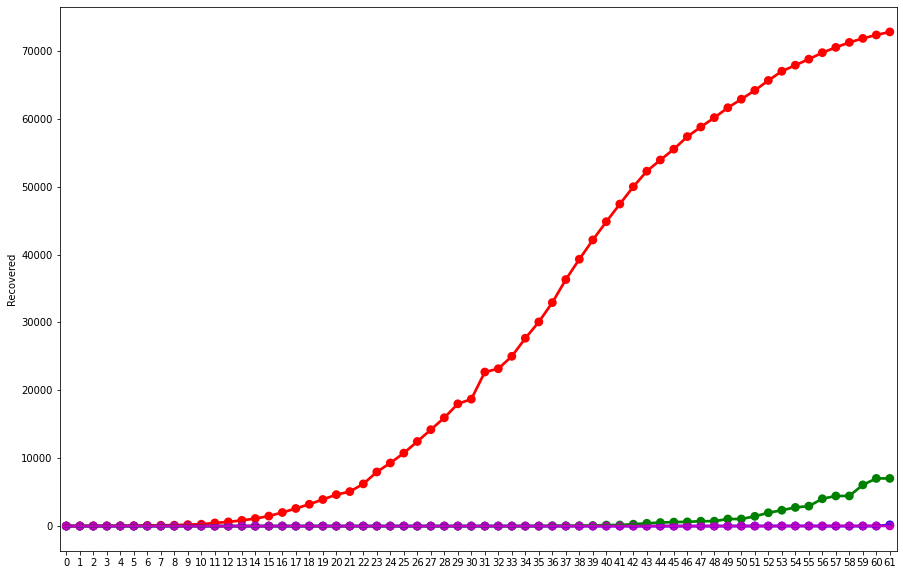

In [29]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.Recovered, color = 'red')
sns.pointplot(US.index, US.Recovered, color = 'blue')
sns.pointplot(Italy.index, Italy.Recovered, color = 'green')
sns.pointplot(India.index, India.Recovered, color = 'm')

In [30]:
total_casesC = covid.groupby('country')['active'].sum().reset_index().sort_values(by='active', ascending = False)

In [31]:
total_casesC.style.background_gradient(cmap='Blues_r')

,country,active
33,China,1624545.000000
86,Italy,407570.000000
155,Spain,162715.000000
154,South Korea,162275.000000
64,Germany,158657.000000
82,Iran,158032.000000
172,US,154229.000000
59,France,110216.000000
160,Switzerland,45549.000000
176,United Kingdom,33175.000000


In [32]:
total_active = covid['active'].sum()
total_active

3352375.0

In [35]:
from fbprophet import Prophet

In [37]:
confirmed = covid.groupby('Date').sum()['Confirmed'].reset_index()
deaths = covid.groupby('Date').sum()['Deaths'].reset_index()
recovered = covid.groupby('Date').sum()['Recovered'].reset_index()

In [38]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [39]:
deaths.head()

,Date,Deaths
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


In [40]:
recovered.head()

,Date,Recovered
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0


In [43]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [44]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = m.make_future_dataframe(periods=10)

In [46]:
future.tail()

,ds
67,2020-03-29
68,2020-03-30
69,2020-03-31
70,2020-04-01
71,2020-04-02


In [47]:
forecast = m.predict(future)

In [48]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-7287.611732,-30191.675123,9119.664987,-7287.611732,-7287.611732,-2198.640357,-2198.640357,-2198.640357,-2198.640357,-2198.640357,-2198.640357,0.0,0.0,0.0,-9486.252089
1,2020-01-23,-4596.749352,-25478.407808,15301.681040,-4596.749352,-4596.749352,-1391.184356,-1391.184356,-1391.184356,-1391.184356,-1391.184356,-1391.184356,0.0,0.0,0.0,-5987.933708
2,2020-01-24,-1905.886972,-22438.977046,20080.350992,-1905.886972,-1905.886972,399.348017,399.348017,399.348017,399.348017,399.348017,399.348017,0.0,0.0,0.0,-1506.538955
3,2020-01-25,784.975415,-17020.818385,21651.363942,784.975415,784.975415,1531.063631,1531.063631,1531.063631,1531.063631,1531.063631,1531.063631,0.0,0.0,0.0,2316.039046
4,2020-01-26,3475.837802,-12475.051228,26471.430257,3475.837802,3475.837802,2856.132573,2856.132573,2856.132573,2856.132573,2856.132573,2856.132573,0.0,0.0,0.0,6331.970375


In [49]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
67,2020-03-29,405307.954675,384115.878679,427717.681271
68,2020-03-30,418529.648466,396874.098046,440190.859963
69,2020-03-31,431101.041003,409024.107862,456040.962056
70,2020-04-01,446176.946518,422369.364121,471829.354907
71,2020-04-02,462292.324110,433139.673381,489881.459756


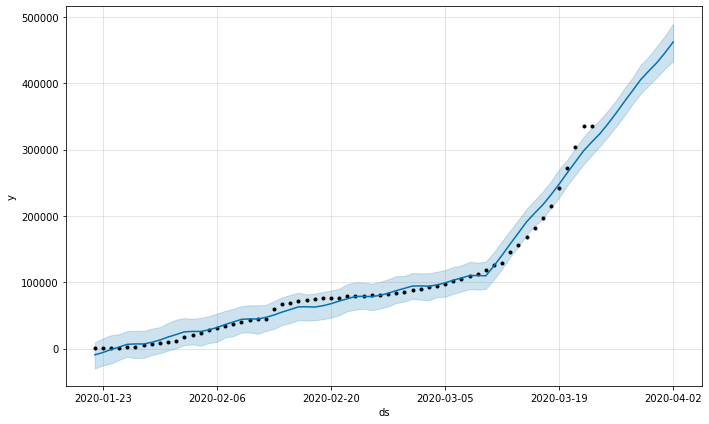

In [50]:
plot = m.plot(forecast)

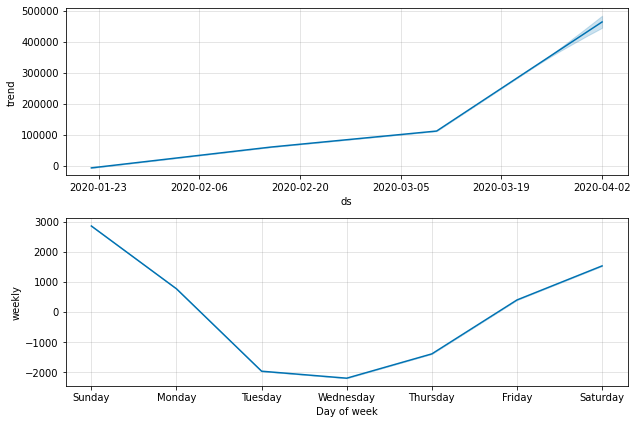

In [51]:
plot1 = m.plot_components(forecast)

In [52]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)

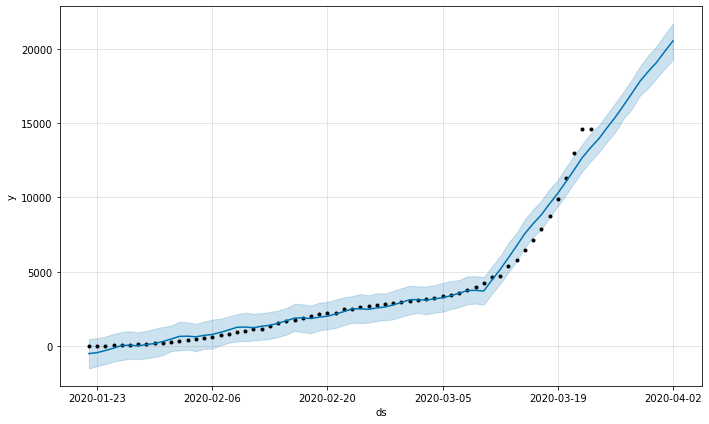

In [54]:
plot = m.plot(forecast)

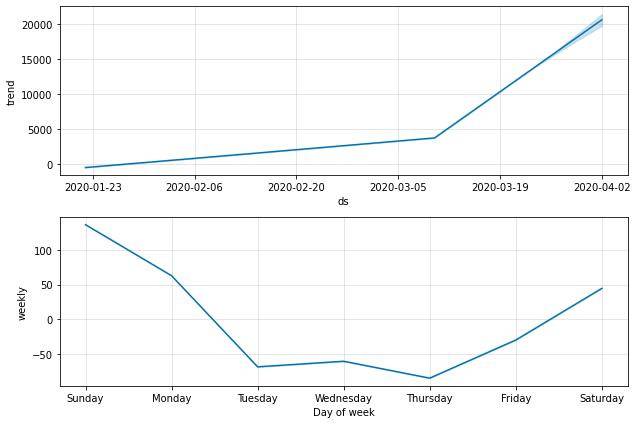

In [55]:
plot1 = m.plot_components(forecast)

In [56]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m = Prophet(interval_width=0.95)
m.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)

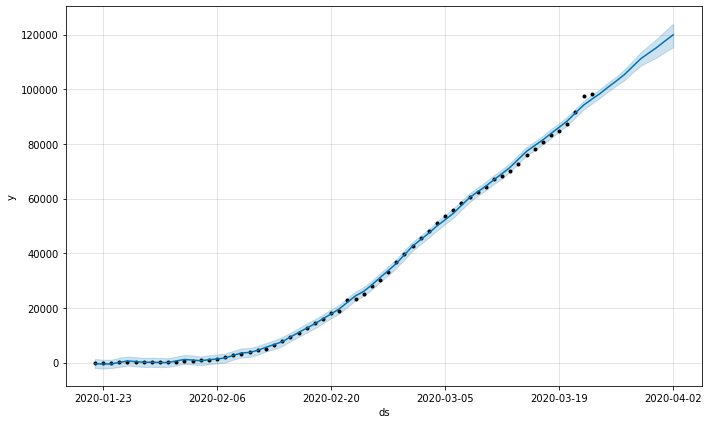

In [58]:
plot = m.plot(forecast)

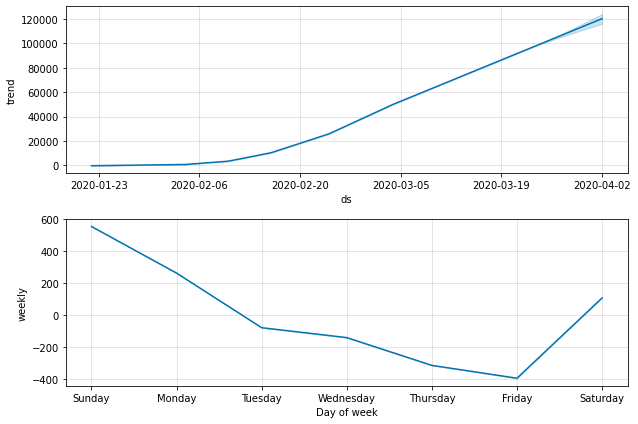

In [59]:
plot1 = m.plot_components(forecast)